<a href="https://colab.research.google.com/github/Alex-Devoid/ST-554-Project1/blob/main/Task2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Devoid, Emma Martinez, Lanette Tyler   
ST 554 Project 1 Spring 2026   
Task 2 EDA Lanette Tyler

# Introduction

## Purpose     
The purpose of this project is to analyze the [air quality data set](https://archive.ics.uci.edu/dataset/360/air+quality) available from the UCI Machine Learning Repository. The data set includes non-true sensor measurements of air pollutant concentrations, gold-standard or true air pollutant concetrations measured by a reference analyzer, and corresponding weather data. This analysis includes three tasks:

1.   **Writing two gradient descent type algorithms** to find the optimal constant to use for squared error loss and to find the optimal intercept and slope from a simple linear regression (SLR) model   

2.   **Extensive Exploratory Data Analysis** to understand the relationships between the true C6H6 values and the sensor values, and between the true C6H6 values and the weather variables   

3.   **Data Modeling** using a cross-validation algorithm to evaluate a simple linear regression (SLR) model using true CO to predict true C6H6, and a multiple linear regression model in the time series setting to predict true C6H6 using true CO, temperature, relative humidity, and absolute humidity

## Data
The data set contains 9358 observations of true pollutant concentrations, sensor-read pollutant concentrations, and weather factors. The observations were made from March, 2004, to Febraury, 2005, in a significantly polluted area at road level in a city in Italy. Each observation represents an hourly average.


Specific variables in the data set are as follows:   

-   True C6H6 concentration (micrograms/cubic meter)

-   True CO concentration (mg/cubic meter)

-   CO Sensor Response     

-   True Non-metanic hydrocarbon (NMHC) concentration (micrograms/cubic meter)      

-   NMHC sensor response   

-   True NOx concentration (parts per billion)   

-   NOx sensor response   

-   True NO2 concentration (micrograms/cubic meter)

-   NO2 sensor response  

-   O3 sensor response   

-   Temperature (C)   

-   Relative humidity (%)

-   Absolute humidity


# Task 2: Exploratory Data Analysis

This exploratory data analysis investigates the relationships between the true C6H6 concentration and the sensor readings for CO, NMHC, NOx, NO2, and O3, and between the true C6H6 concentration and the weather variables temperature, relative humidity, and absolute humidity.

## Preliminary Data Tasks

### Install and Import Modules

In [ ]:
#install module for reading data from UCI
!pip install ucimlrepo

In [ ]:
#import modules
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
#import matplotlib as mplt
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### Read in data

In [ ]:
#fetch dataset
air_quality = fetch_ucirepo(id=360)

#data (as pandas dataframes)
air_qu = air_quality.data.features

#take a look at the first few observations
air_qu.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Data Cleaning and Validation

In [ ]:
#look at the info about the data
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


#### Rename variables and subset data

In [ ]:
#rename vars for convenience
air_qu = air_qu.rename(columns = {"PT08.S1(CO)": "CO", "C6H6(GT)": "true_C6H6",
                              "PT08.S2(NMHC)": "NMHC", "PT08.S3(NOx)": "NOx",
                              "PT08.S4(NO2)": "NO2", "PT08.S5(O3)": "O3",
                              "Date": "date", "Time": "time", "T": "temp",
                              "RH": "rel_hum", "AH": "abs_hum"})

#subset data to variables of interest in this analysis
air_qu = air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3", "date", "time",
                 "temp", "rel_hum", "abs_hum"]]

#take a look
air_qu.head()

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum
0,11.9,1360,1046,1056,1692,1268,3/10/2004,18:00:00,13.6,48.9,0.7578
1,9.4,1292,955,1174,1559,972,3/10/2004,19:00:00,13.3,47.7,0.7255
2,9.0,1402,939,1140,1555,1074,3/10/2004,20:00:00,11.9,54.0,0.7502
3,9.2,1376,948,1092,1584,1203,3/10/2004,21:00:00,11.0,60.0,0.7867
4,6.5,1272,836,1205,1490,1110,3/10/2004,22:00:00,11.2,59.6,0.7888


#### Remove missing values

Check for explicit missing values.

In [ ]:
air_qu.isnull().sum()

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


The zeros in each row above indicate that there are no explicit missing values. In this datset, missing values are represented by -200. Now check for -200.

In [ ]:
air_qu.isin([-200.0]).any()

,0
true_C6H6,True
CO,True
NMHC,True
NOx,True
NO2,True
O3,True
date,False
time,False
temp,True
rel_hum,True


The variable columns listed above with "True" values contain -200. Replace them with np.nan for easier removal.

In [ ]:
#replace -200.0 with np.nan
air_qu = air_qu.replace([-200.0],[np.nan])
air_qu.isnull().sum() #see the nan's

,0
true_C6H6,366
CO,366
NMHC,366
NOx,366
NO2,366
O3,366
date,0
time,0
temp,366
rel_hum,366


Remove the observations/rows with NaN values.

In [ ]:
#remove the rows with np.nan values
air_qu = air_qu.dropna()
air_qu.isnull().sum() #see that there are no nan's left

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


Rows with missing values have been removed. Now let's reset the index.

In [ ]:
#fix index
air_qu = air_qu.reset_index(drop = True)
#air_qu = air_qu.rename(columns = {"index": "old_index"})
air_qu

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum
0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,3/10/2004,18:00:00,13.6,48.9,0.7578
1,9.4,1292.0,955.0,1174.0,1559.0,972.0,3/10/2004,19:00:00,13.3,47.7,0.7255
2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,3/10/2004,20:00:00,11.9,54.0,0.7502
3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,3/10/2004,21:00:00,11.0,60.0,0.7867
4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,3/10/2004,22:00:00,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
8986,13.5,1314.0,1101.0,539.0,1374.0,1729.0,4/4/2005,10:00:00,21.9,29.3,0.7568
8987,11.4,1163.0,1027.0,604.0,1264.0,1269.0,4/4/2005,11:00:00,24.3,23.7,0.7119
8988,12.4,1142.0,1063.0,603.0,1241.0,1092.0,4/4/2005,12:00:00,26.9,18.3,0.6406
8989,9.5,1003.0,961.0,702.0,1041.0,770.0,4/4/2005,13:00:00,28.3,13.5,0.5139


#### Update Data Types and Add Columns

Change the values in the date column from string type to datetime.date type. Add columns for year, month and week by extracting the values from the date.

In [ ]:
for i in range(0, len(air_qu)):
    air_qu.loc[i, "date"] = datetime.strptime(air_qu.loc[i, "date"], "%m/%d/%Y").date()
    air_qu.loc[i, "year"] = air_qu.date[i].year
    air_qu.loc[i, "month"] = air_qu.date[i].month
    air_qu.loc[i, "week"] = air_qu.date[i].strftime("%V")

#make the new columns integers
air_qu.year = air_qu.year.astype("int64")
air_qu.month = air_qu.month.astype("int64")
air_qu.week = air_qu.week.astype("int64")

air_qu.head() #take a look at the results

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum,year,month,week
0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18:00:00,13.6,48.9,0.7578,2004,3,11
1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19:00:00,13.3,47.7,0.7255,2004,3,11
2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20:00:00,11.9,54.0,0.7502,2004,3,11
3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21:00:00,11.0,60.0,0.7867,2004,3,11
4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22:00:00,11.2,59.6,0.7888,2004,3,11


Change the values in the time column to simple integers. Rename the time column as hour.

In [ ]:
#change time values to simple integers
for i in range(0, len(air_qu)):
    air_qu.loc[i, "time"] = air_qu.loc[i, "time"][:-6]

#rename time column as hour column
air_qu = air_qu.rename(columns = {"time": "hour"})

#change hour column to integer type
air_qu.hour = air_qu.hour.astype("int64")

air_qu.head() #take a look at the results

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,hour,temp,rel_hum,abs_hum,year,month,week
0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18,13.6,48.9,0.7578,2004,3,11
1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19,13.3,47.7,0.7255,2004,3,11
2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20,11.9,54.0,0.7502,2004,3,11
3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21,11.0,60.0,0.7867,2004,3,11
4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22,11.2,59.6,0.7888,2004,3,11


#### Check for Reasonable Values

Float-Type Column Summaries

In [ ]:
air_qu.describe(include = "float")

,true_C6H6,CO,NMHC,NOx,NO2,O3,temp,rel_hum,abs_hum
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,7.449820,217.080037,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,4.400000,937.000000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,8.200000,1063.000000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,14.000000,1231.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,63.700000,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


The float-type columns in the table above appear to be reasonable values.

Integer Type Column Summaries

In [ ]:
air_qu.describe(include = "int")

,hour,year,month,week
count,8991.000000,8991.000000,8991.000000,8991.000000
mean,11.479591,2004.234568,6.327772,26.363808
std,6.913320,0.423752,3.407854,15.099842
min,0.000000,2004.000000,1.000000,1.000000
25%,5.000000,2004.000000,3.000000,13.000000
50%,11.000000,2004.000000,6.000000,26.000000
75%,17.000000,2004.000000,9.000000,40.000000
max,23.000000,2005.000000,12.000000,53.000000


The integer-type variables in the table above appear to be reasonable values.

Object Type Column Summaries

In [ ]:
air_qu.describe(include = "object")

,date
count,8991
unique,383
top,2005-04-03
freq,24


The object-type data column detailed in the table above appears to be reasonable.

# Univariate Data Summaries

## Response Variable: True Benzene (C6H6) Concentration

In [ ]:
air_qu.true_C6H6.describe()[1:].round(2)

,true_C6H6
mean,10.08
std,7.45
min,0.10
25%,4.40
50%,8.20
75%,14.00
max,63.70


The response variable, true C6H6 concentration, has a mean of about 10. The variability is fairly high with a standard deviation around 7 1/2. The mean of about ten is higher than the median around 8, indicating the variable is right-skewed. The comparatively large spread between the 75th percentile of 14 and maximum value around 64 also indicates a right-skewed data set.

<Axes: title={'center': 'True C6H6 Concentration'}>

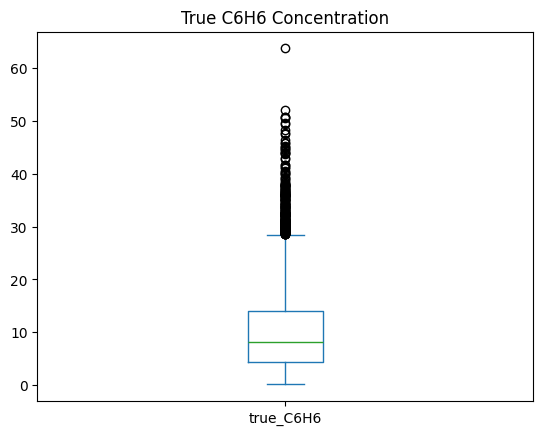

In [ ]:
air_qu.true_C6H6.plot.box(title = "True C6H6 Concentration")

The boxplot of C6H6 concentration values shows a substantial number of high outliers, which is consistent with the numeric summary above indicating a right-skwed data set.

[Text(0.5, 0, 'C6H6 Concentration (micrograms per cubic meter)')]

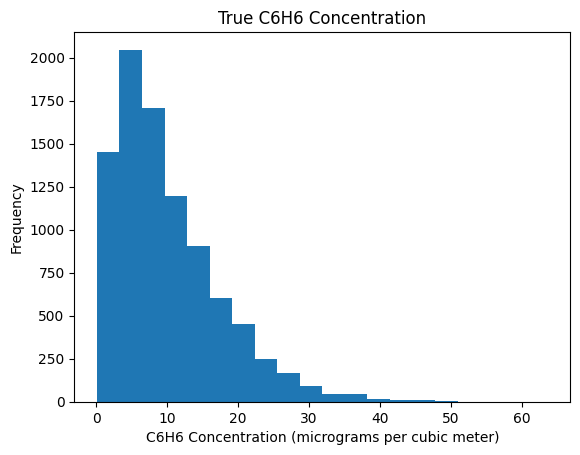

In [ ]:
air_qu.true_C6H6.plot.hist(bins = 20,
    title = "True C6H6 Concentration")\
    .set(xlabel = "C6H6 Concentration (micrograms per cubic meter)")

The histogram of true C6H6 concentration also reveals a right-skewed data set.

## Predictor Variables: Sensor Readings for Environmental Pollutants

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2", "O3"]].describe()[1:].round(2)

,CO,NMHC,NOx,NO2,O3
mean,1099.83,939.15,835.49,1456.26,1022.91
std,217.08,266.83,256.82,346.21,398.48
min,647.00,383.00,322.00,551.00,221.00
25%,937.00,734.50,658.00,1227.00,731.50
50%,1063.00,909.00,806.00,1463.00,963.00
75%,1231.00,1116.00,969.50,1674.00,1273.50
max,2040.00,2214.00,2683.00,2775.00,2523.00


The mean hourly sensor readings for environmental pollutants are around 1,000, with standard deviations less than half the mean value, so less variable than the tru C6H6 concentration values. NO2 is the highest, with mean value around 1456 and standard deviation around 346. NO2 is the lowest with mean value around 835 with standard deviation about 257. Like the true C6H6 concentration values, the sensor readings seem right-skewed. This is clear because the medians are smaller than the means, except for NO2, and because the spreads from 75th percentile to maximum are coparatively large.

[Text(0, 0.5, 'Sensor-Read Concentration')]

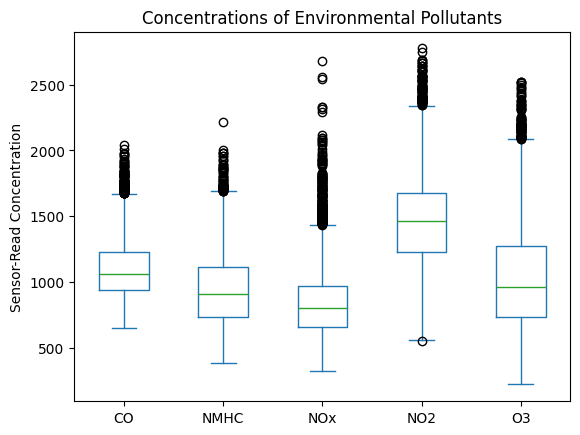

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2","O3"]].plot.box(label = "CO",
                   title = "Concentrations of Environmental Pollutants")\
                   .set(ylabel = "Sensor-Read Concentration")

There are a lot of high outliers visible on the boxplots of the sensor readings and clear overlap between the variables, with NO2 higher thn the rest.

Text(0.5, 0, 'Sensor-Read Concentration')

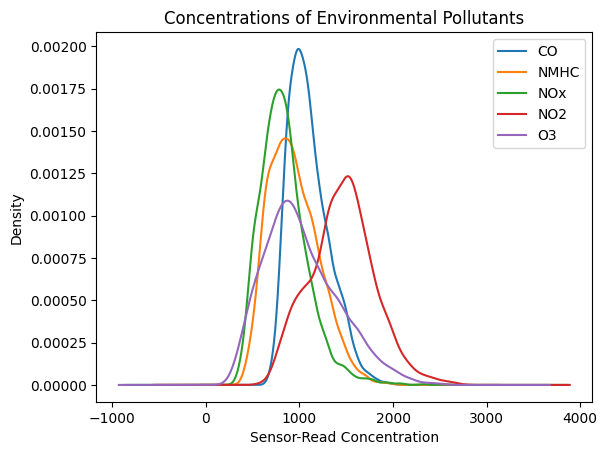

In [ ]:
air_qu["CO"].plot.density(title="Concentrations of Environmental Pollutants",
                          label = "CO")
air_qu["NMHC"].plot.density(label = "NMHC")
air_qu["NOx"].plot.density(label = "NOx")
air_qu["NO2"].plot.density(label = "NO2")
air_qu["O3"].plot.density(label = "O3")
plt.legend()
plt.xlabel("Sensor-Read Concentration")

The histogram also shows NO2 as the highest sensor value and NOx as (barely) the lowest value. All pollutants except for NO2 are at least a little right-skewed. There is clear overlap between the variables.

## Predictor Variables: Environment

In [ ]:
air_qu[["temp", "rel_hum", "abs_hum"]].describe()[1:]

,temp,rel_hum,abs_hum
mean,18.317829,49.234201,1.025530
std,8.832116,17.316892,0.403813
min,-1.900000,9.200000,0.184700
25%,11.800000,35.800000,0.736800
50%,17.800000,49.600000,0.995400
75%,24.400000,62.500000,1.313700
max,44.600000,88.700000,2.231000


The temperature ranges from -1.9 to 44.6 C, with a mean of 18.3, and a standard deviation less than half the mean at 8.8. The realtive humidity ranges from 9.2 to 88.7&, with mean 17.3 and standard deviation less than half that at 17.3. The absolute humidity ranges from 0.2 to 2.2 with a mean of 1.03 and standard deviation 0.4.

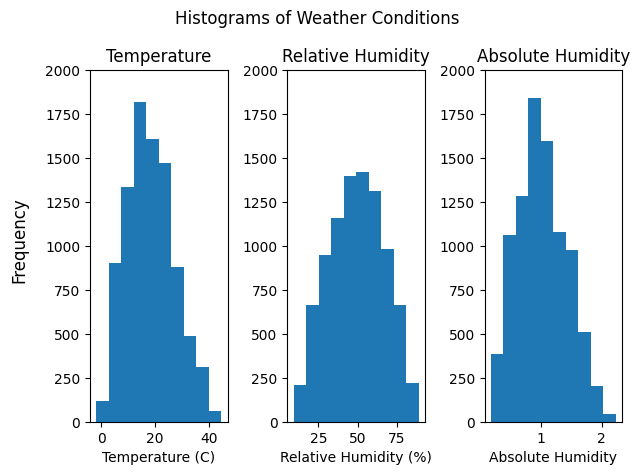

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.suptitle("Histograms of Weather Conditions")
fig.supylabel("Frequency")

ax[0].hist(air_qu.temp); ax[0].set_title("Temperature")
ax[0].set_xlabel("Temperature (C)")
ax[0].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[1].hist(air_qu.rel_hum); ax[1].set_title("Relative Humidity")
ax[1].set_xlabel("Relative Humidity (%)")
ax[1].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[2].hist(air_qu.abs_hum); ax[2].set_title("Absolute Humidity")
ax[2].set_xlabel("Absolute Humidity")
ax[2].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

fig.tight_layout()


The distribution of the environmental factors are pictured in the histograms above. They all look somewhat normal, whith temperature and absolute humidity a bit right-skewed.

# Multivariate Summaries

## True C6H6 and Pollutant Sensors

### Correlation coefficients between the true C6H6 concentration and sensor readings for environmental pollutants

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3"]].corr().iloc[0, range(1, 6)]

Correlation Coefficicients


,true_C6H6
CO,0.883795
NMHC,0.981950
NOx,-0.735744
NO2,0.765731
O3,0.865689


There is a strong positive correlation between true C6H6 conctration and CO, NMHC, NO2, and O3 sensor readings, ranging from 0.7657 up to 0.9820. The strongest correlation is to NMHC at 0.9820, and next strongest to CO at 0.8838. There is also a strong negative correlation between true C6H6 concentration and NOx, at -0.7357.

### Scatter plots of true C6H6 vs. environmental pollutant sensor readings

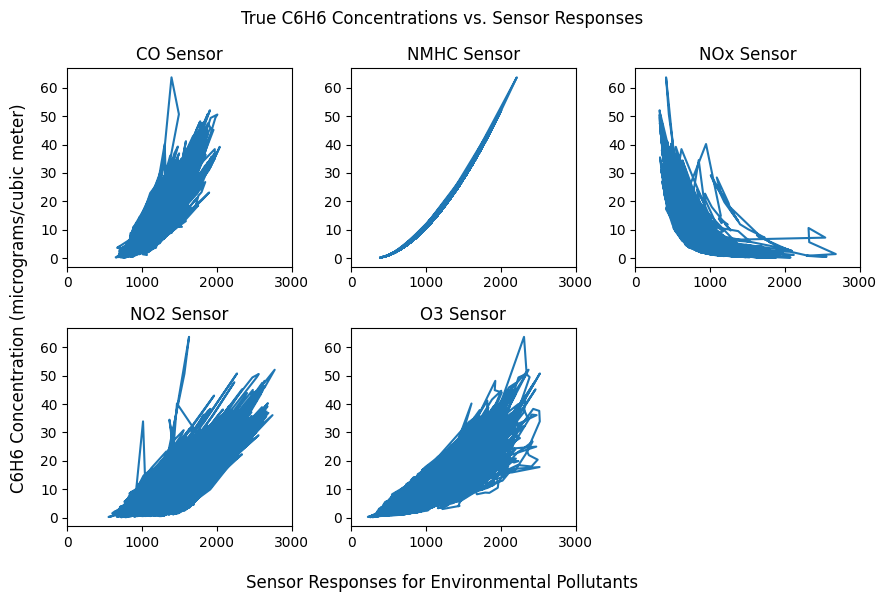

In [ ]:
x1, x2, x3, x4, x5 = air_qu.CO, air_qu.NMHC, air_qu.NOx, air_qu.NO2, air_qu.O3
y = air_qu.true_C6H6

fig, (ax1, ax2) = plt.subplots(2,3, figsize = (9,6))
fig.suptitle("True C6H6 Concentrations vs. Sensor Responses")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
fig.supxlabel("Sensor Responses for Environmental Pollutants")

ax1[0].plot(x1, y); ax1[0].set_title("CO Sensor")
ax1[0].set_xticks([0, 1000, 2000, 3000])

ax1[1].plot(x2, y); ax1[1].set_title("NMHC Sensor")
ax1[1].set_xticks([0, 1000, 2000, 3000])

ax1[2].plot(x3, y); ax1[2].set_title("NOx Sensor")
ax1[2].set_xticks([0, 1000, 2000, 3000])

ax2[0].plot(x4, y); ax2[0].set_title("NO2 Sensor")
ax2[0].set_xticks([0, 1000, 2000, 3000])

ax2[1].plot(x5, y); ax2[1].set_title("O3 Sensor")
ax2[1].set_xticks([0, 1000, 2000, 3000])

ax2[2].remove()

fig.tight_layout()

The strong correlations shown by the correlation coefficients calculated above are clear in the scatter plots, most positive and one negative.

## True C6H6, Sensor Readings, and Sensor Life

Correlation coeeficients between the true C6H6 concentration and sensor readings for environmental pollutants grouped by sensor_life are calcualted below. Sensor_life is a categorical variable based on months in service. According to the journal article about the data, the expected operational lifespan for the sensors is 12 months. Sensor_life has two categories, either in_range (the first 12 months) or out_of_range (the final two months).

Create sensor_life categorical variable.

In [ ]:
#add sensor_life column to data set, derived from month data, indicating if sensor
#is in or out of its expecated operational range with regard to sensor age (12 months)
for i in range(0, len(air_qu)):
    if air_qu.year[i] == 2005:
        if air_qu.month[i] == 3:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        elif air_qu.month[i] == 4:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        else:
            air_qu.loc[i, "sensor_life"] = "in_range"
            #print("in range")
    else:
        air_qu.loc[i, "sensor_life"]  = "in_range"

### Correlation coefficients between true C6H6 concentration and sensor readings for environmental pollutants grouped by *sensor_life*

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","sensor_life"]]\
    .groupby("sensor_life").corr()["true_C6H6"]

Correlation Coefficients


sensor_life            
in_range      true_C6H6    1.000000
              CO           0.888218
              NMHC         0.981925
              NOx         -0.750423
              NO2          0.766235
              O3           0.870896
out_of_range  true_C6H6    1.000000
              CO           0.912919
              NMHC         0.983735
              NOx         -0.813664
              NO2          0.846461
              O3           0.867681
Name: true_C6H6, dtype: float64

The magnitude of the correlations between true C6H6 and the sensor readings grew a bit stronger for all correlation coefficients except O3, which decreased a tad.

### Scatter plots of true C6H6 vs. sensor readings grouped by sensor_life

First create new columns to hold sensor-type labels in preparation for pivoting to long data for the grouped scatter plots.

In [ ]:
for i in range(0, len(air_qu)):
    air_qu.loc[i, "CO_label"] = "CO"
    air_qu.loc[i, "NMHC_label"] = "NMHC"
    air_qu.loc[i, "NOx_label"] = "NOx"
    air_qu.loc[i, "NO2_label"] = "NO2"
    air_qu.loc[i, "O3_label"] = "O3"

air_qu              #take a look

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,hour,temp,rel_hum,abs_hum,year,month,week,sensor_life,CO_label,NMHC_label,NOx_label,NO2_label,O3_label
0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18,13.6,48.9,0.7578,2004,3,11,in_range,CO,NMHC,NOx,NO2,O3
1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19,13.3,47.7,0.7255,2004,3,11,in_range,CO,NMHC,NOx,NO2,O3
2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20,11.9,54.0,0.7502,2004,3,11,in_range,CO,NMHC,NOx,NO2,O3
3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21,11.0,60.0,0.7867,2004,3,11,in_range,CO,NMHC,NOx,NO2,O3
4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22,11.2,59.6,0.7888,2004,3,11,in_range,CO,NMHC,NOx,NO2,O3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,13.5,1314.0,1101.0,539.0,1374.0,1729.0,2005-04-04,10,21.9,29.3,0.7568,2005,4,14,out_of_range,CO,NMHC,NOx,NO2,O3
8987,11.4,1163.0,1027.0,604.0,1264.0,1269.0,2005-04-04,11,24.3,23.7,0.7119,2005,4,14,out_of_range,CO,NMHC,NOx,NO2,O3
8988,12.4,1142.0,1063.0,603.0,1241.0,1092.0,2005-04-04,12,26.9,18.3,0.6406,2005,4,14,out_of_range,CO,NMHC,NOx,NO2,O3
8989,9.5,1003.0,961.0,702.0,1041.0,770.0,2005-04-04,13,28.3,13.5,0.5139,2005,4,14,out_of_range,CO,NMHC,NOx,NO2,O3


In [ ]:
#make long data

long_data = pd.melt(air_qu,
                    id_vars=["CO_label", "NMHC_label", "NOx_label", "NO2_label",
                             "O3_label", "true_C6H6", "sensor_life", "temp_label",
                             "rh_label", "ah_label"],
                    value_vars=["CO", "NMHC", "NOx", "NO2", "O3"],
                    var_name = "sensor_type",
                    value_name = "sensor_rdg")
long_data = long_data.drop(columns = ["CO_label", "NMHC_label", "NOx_label", "NO2_label", "O3_label"])

long_data #take a look

,true_C6H6,sensor_life,temp_label,rh_label,ah_label,sensor_type,sensor_rdg
0,11.9,in_range,Low Temp,Low RH,Low AH,CO,1360.0
1,9.4,in_range,Low Temp,Low RH,Low AH,CO,1292.0
2,9.0,in_range,Low Temp,High RH,Low AH,CO,1402.0
3,9.2,in_range,Low Temp,High RH,Low AH,CO,1376.0
4,6.5,in_range,Low Temp,High RH,Low AH,CO,1272.0
...,...,...,...,...,...,...,...
44950,13.5,out_of_range,High Temp,Low RH,Low AH,O3,1729.0
44951,11.4,out_of_range,High Temp,Low RH,Low AH,O3,1269.0
44952,12.4,out_of_range,High Temp,Low RH,Low AH,O3,1092.0
44953,9.5,out_of_range,High Temp,Low RH,Low AH,O3,770.0


Make the scatter plots.

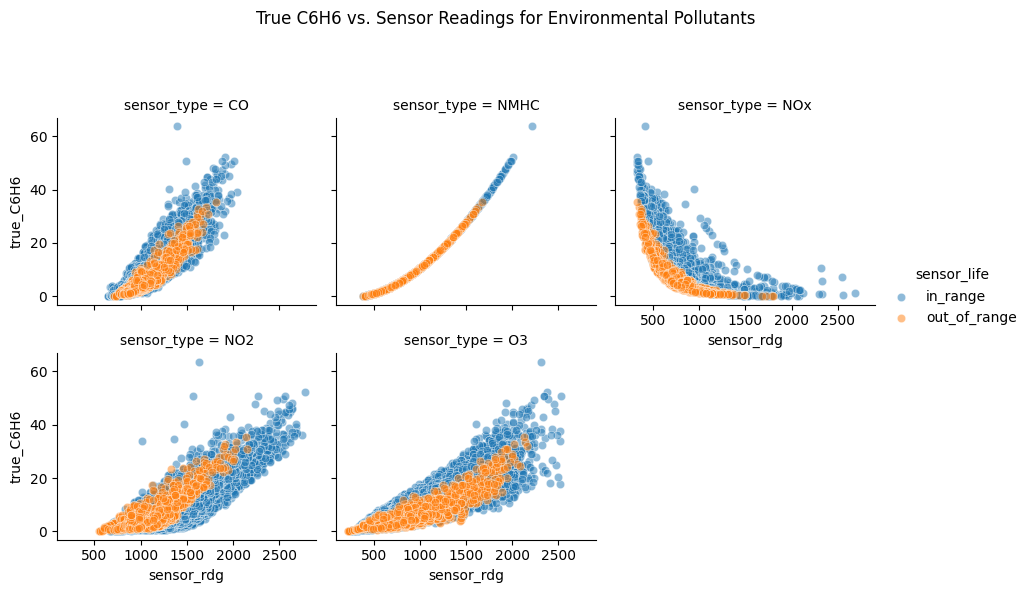

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "sensor_life",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for Environmental Pollutants")
plt.subplots_adjust(top=0.8) #tilte spacing




The true C6H6 vs. sensor reading scatter plots show lower spreads for in-range than for out-of-range sensor readings and true concentration values. It also looks like correaltion is pretty simliar, with slight differences only.

In [ ]:
daily_mean = air_qu.groupby("date").mean("true_C6H6", "CO")

#add sensor_life designation column to daily mean

for i in range(0, daily_mean(air_qu)):
    if air_qu.year[i] == 2005:
        if air_qu.month[i] == 3:
            air_qu.loc[i, "sensor_life"] = "out of range"
            #print("out of range")
        elif air_qu.month[i] == 4:
            air_qu.loc[i, "sensor_life"] = "out of range"
            #print("out of range")
        else:
            air_qu.loc[i, "sensor_life"] = "in_range"
            #print("in range")
    else:
        air_qu.loc[i, "sensor_life"]  = "in_range"

sns.scatterplot(x= "CO", y= "true_C6H6", data = daily_mean, hue = "sensor_life")

ValueError: Could not interpret value `sensor_life` for `hue`. An entry with this name does not appear in `data`.

## True C6H6 and Weather Conditions

Correlation coefficients between true C6H6 concentration and the weather conditions temperature (C), relative humidity (%), and absolute humidity are calculated below.

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "temp", "rel_hum", "abs_hum"]].corr().iloc[0, range(1, 4)]

Correlation Coefficicients


,true_C6H6
temp,0.198956
rel_hum,-0.061681
abs_hum,0.167972


The correlation coefficients do not indicate a relationship between weather conditions and true C6H6 values. Both temperature and absolute humidity show a low but positive corralation to C6H6 concentration (0.1990 and 0.1680, respectively), and relative huidity shows an even lower but negative correlation to C6H6 concetration (-0.0617).

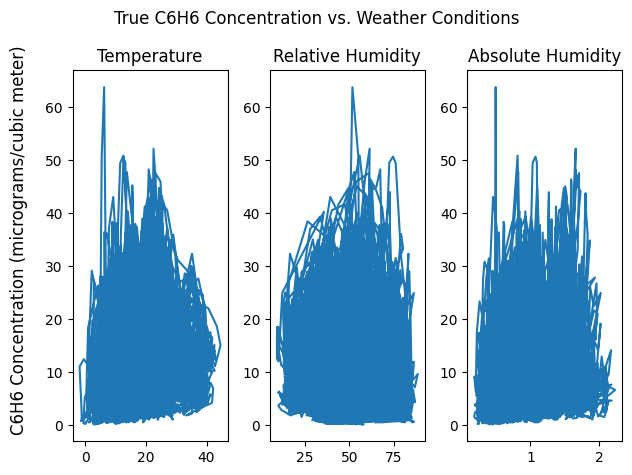

In [ ]:
x1, x2, x3 = air_qu.temp, air_qu.rel_hum, air_qu.abs_hum
y = air_qu.true_C6H6

fig, ax = plt.subplots(1,3)
fig.suptitle("True C6H6 Concentration vs. Weather Conditions")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
#fig.supxlabel("Sensor Responses for Environmental Pollutant Concentrations")

ax[0].plot(x1, y); ax[0].set_title("Temperature")
ax[1].plot(x2, y); ax[1].set_title("Relative Humidity")
ax[2].plot(x3, y); ax[2].set_title("Absolute Humidity")

fig.tight_layout()

The scatter plots above back up the findings from the correlation coefficients. Neither positive nor negative linear relation ship is apparent in these graphs.

## True C6H6, Sensor Readings, and Weather Conditions

First create new columns to hold labels for categorical weather variables in preparation for pivoting to long data for the grouped scatter plots. Compare numeric values in weather condition columns to the mean of the column, and assign values gretaer than the mean to high and the rest to low.

In [ ]:
#create categorical variables from numeric variables of weather conditions

#set reference values
mean_temp = air_qu.temp.mean()
mean_rh = air_qu.rel_hum.mean()
mean_ah = air_qu.abs_hum.mean()

#iterate to populate categorical columns
for i in range(0, len(air_qu)):
    if air_qu.loc[i, "temp"] > mean_temp:
        air_qu.loc[i, "temp_label"] = "High Temp"
    else:
        air_qu.loc[i, "temp_label"] = "Low Temp"

    if air_qu.loc[i, "rel_hum"] > mean_rh:
        air_qu.loc[i, "rh_label"] = "High RH"
    else:
        air_qu.loc[i, "rh_label"] = "Low RH"

    if air_qu.loc[i, "abs_hum"] > mean_ah:
        air_qu.loc[i, "ah_label"] = "High AH"
    else:
        air_qu.loc[i, "ah_label"] = "Low AH"

air_qu              #take a look

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,hour,temp,rel_hum,...,week,sensor_life,CO_label,NMHC_label,NOx_label,NO2_label,O3_label,rh_label,ah_label,temp_label
0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18,13.6,48.9,...,11,in_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,Low Temp
1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19,13.3,47.7,...,11,in_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,Low Temp
2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20,11.9,54.0,...,11,in_range,CO,NMHC,NOx,NO2,O3,High RH,Low AH,Low Temp
3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21,11.0,60.0,...,11,in_range,CO,NMHC,NOx,NO2,O3,High RH,Low AH,Low Temp
4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22,11.2,59.6,...,11,in_range,CO,NMHC,NOx,NO2,O3,High RH,Low AH,Low Temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,13.5,1314.0,1101.0,539.0,1374.0,1729.0,2005-04-04,10,21.9,29.3,...,14,out_of_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,High Temp
8987,11.4,1163.0,1027.0,604.0,1264.0,1269.0,2005-04-04,11,24.3,23.7,...,14,out_of_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,High Temp
8988,12.4,1142.0,1063.0,603.0,1241.0,1092.0,2005-04-04,12,26.9,18.3,...,14,out_of_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,High Temp
8989,9.5,1003.0,961.0,702.0,1041.0,770.0,2005-04-04,13,28.3,13.5,...,14,out_of_range,CO,NMHC,NOx,NO2,O3,Low RH,Low AH,High Temp


### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low temperature



In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","temp_label"]]\
    .groupby("temp_label").corr()["true_C6H6"]

Correlation Coefficients


temp_label           
High Temp   true_C6H6    1.000000
            CO           0.897714
            NMHC         0.985597
            NOx         -0.779765
            NO2          0.856662
            O3           0.894023
Low Temp    true_C6H6    1.000000
            CO           0.893189
            NMHC         0.980114
            NOx         -0.717671
            NO2          0.752783
            O3           0.876572
Name: true_C6H6, dtype: float64

The correlation coefficients differed slightly between low and high temperature, with low tempearture showing smaller magnitudes than high temperature. The change was genearlly small. It was most noticeable with NO2, which decreased in magnitude by more than 10%.

### Scatter plots of true C6H6 vs. sensor readings grouped by temp

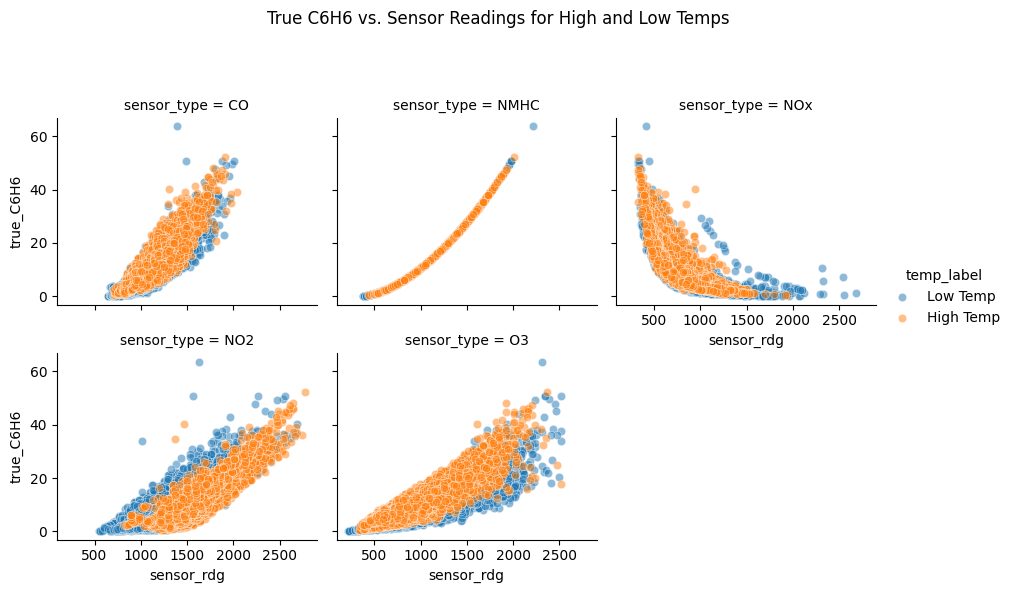

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "temp_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Temps")
plt.subplots_adjust(top=0.8) #title spacing

The sensor readings and true C6H6 values overlap almost completely, perhaps less so with NO2, lining up with the lower correlation coefficient value for NO2.

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low relative humidity

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","rh_label"]]\
    .groupby("rh_label").corr()["true_C6H6"]

Correlation Coefficients


rh_label           
High RH   true_C6H6    1.000000
          CO           0.906049
          NMHC         0.982115
          NOx         -0.748358
          NO2          0.790484
          O3           0.879797
Low RH    true_C6H6    1.000000
          CO           0.874729
          NMHC         0.982895
          NOx         -0.726775
          NO2          0.751992
          O3           0.877138
Name: true_C6H6, dtype: float64

The correlation coefficients for low humidity show means of barely lower magnitude for low relative humidity values.

### Scatter plots of true C6H6 vs. sensor readings grouped by relative humidity

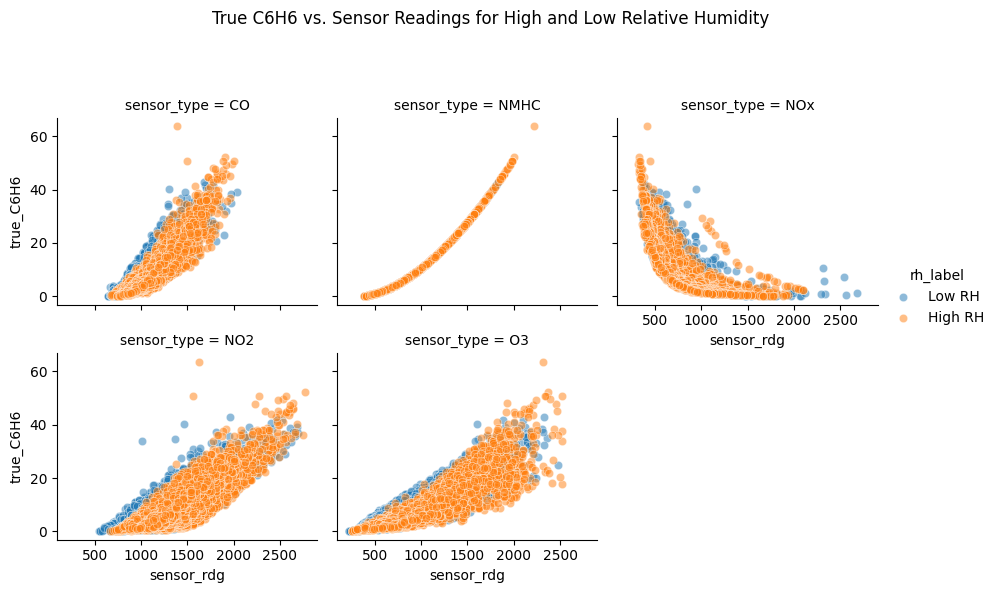

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "rh_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Relative Humidity")
plt.subplots_adjust(top=0.8) #title spacing

The data points for high and low relative humidity show almost complete overlap, more so than temperature, corresponding to the very small changes in calculated correlation values.

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low absolute humidity

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","ah_label"]]\
    .groupby("ah_label").corr()["true_C6H6"]

Correlation Coefficients


ah_label           
High AH   true_C6H6    1.000000
          CO           0.908840
          NMHC         0.984907
          NOx         -0.793286
          NO2          0.879506
          O3           0.899364
Low AH    true_C6H6    1.000000
          CO           0.867022
          NMHC         0.980702
          NOx         -0.704256
          NO2          0.773047
          O3           0.854401
Name: true_C6H6, dtype: float64

The correlation values are all lower magnitude for low absolute value observations than for high absolute value observations. NO2 again stands out with a change over 10%.

### Scatter plots of true C6H6 vs. sensor readings grouped by absolute humidity

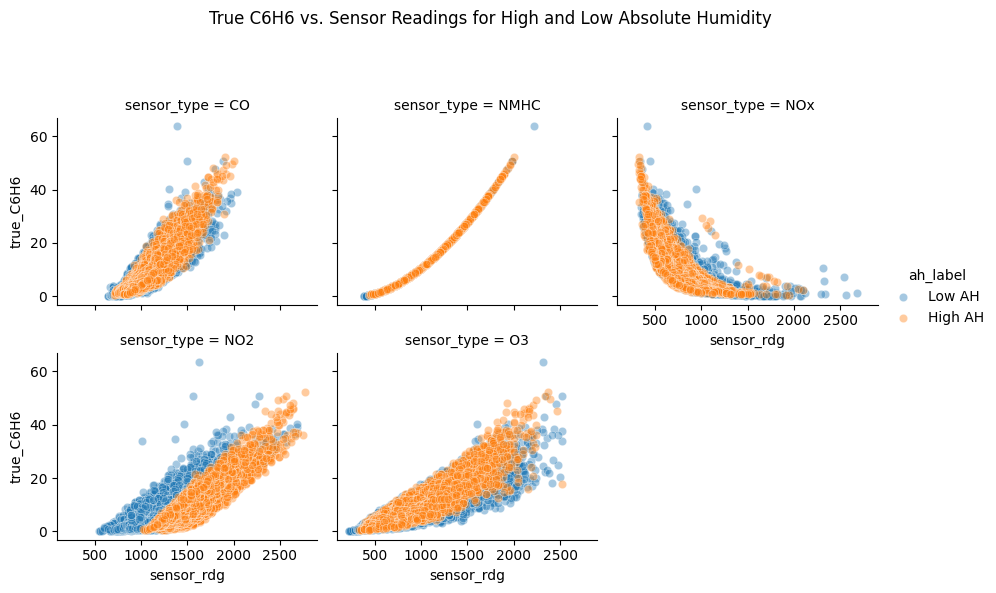

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "ah_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.4)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Absolute Humidity")
plt.subplots_adjust(top=0.8) #title spacing

There is much overlap betweent the high and low absolute value observations, with NO2 sensor readings standing out for less overlap than the others. These plots look similar to the temperature plots. Tihs is a similar result to the temperature grouped correlation and scatter plots for these variables.

## Time Series Summaries

In [ ]:
air_qu.groupby(["year", "month"]).mean(["month"])

true_C6H6           CO         NMHC          NOx          NO2  \
year month                                                                  
2004 3       9.932745  1222.819608   935.643137  1029.172549  1572.072549   
     4      10.389177  1162.849928   949.210678   935.629149  1610.744589   
     5      10.219041  1076.664384   951.094521   947.494521  1601.101370   
     6      10.595748  1020.793255   966.379765   900.467742  1722.376833   
     7      10.599462  1046.434724   971.480485   804.886945  1643.823688   
     8       6.993669   981.060432   838.484892   835.851799  1580.941007   
     9      11.554558  1081.561254   993.508547   810.410256  1546.727920   
     10     13.525303  1184.913863  1058.433378   688.139973  1636.950202   
     11     12.511806  1132.148611  1011.201389   789.880556  1372.234722   
     12      9.498795  1087.111446   915.076807   883.034639  1217.001506   
2005 1       9.024597  1110.951684   891.754026   792.546120  1153.477306   
     2       7.500839  1087.691275   842.238255   791.978188  1057.598993   
     3       8.729744  1145.316285   887.823688   709.406460  1225.344549   
     4       4.285057   953.712644   698.735632   899.471264   976.459770   

                     O3       hour       temp    rel_hum   abs_hum       week  
year month                                                                     
2004 3      1027.494118  11.605882  14.390784  50.170784  0.789413  12.411765  
     4      1004.051948  11.484848  16.800722  50.708514  0.920774  16.112554  
     5       928.206849  11.527397  20.281233  43.542329  0.957332  20.389041  
     6       937.611437  11.456012  26.476540  39.850733  1.275380  24.782991  
     7       994.452221  11.515478  29.419112  33.054240  1.242711  29.126514  
     8       777.385612  11.433094  29.130360  42.979137  1.619434  33.492086  
     9      1036.431624  11.556980  24.620370  43.991880  1.285425  37.957265  
     10     1163.850606  11.496635  20.497577  61.910902  1.464086  42.261104  
     11     1171.354167  11.500000  13.485417  59.274861  0.939991  46.666667  
     12     1082.700301  11.399096  11.140813  57.823042  0.780545  50.992470  
2005 1      1097.572474  11.415813   8.222694  56.566325  0.635098   6.002928  
     2      1032.228188  11.453020   7.113591  52.083557  0.517458   6.724832  
     3      1083.695828  11.500673  13.218843  50.907941  0.781734  10.872140  
     4       646.850575  10.724138  16.660920  35.482759  0.621592  13.172414

In [ ]:
pd.pivot_table(air_qu, values = "true_C6H6", index = (date.month(), date.year()))

NameError: name 'date' is not defined

<Axes: title={'center': 'True C6H6 Over Time, Daily Average'}, xlabel='date', ylabel='True C6H6 Concentration'>

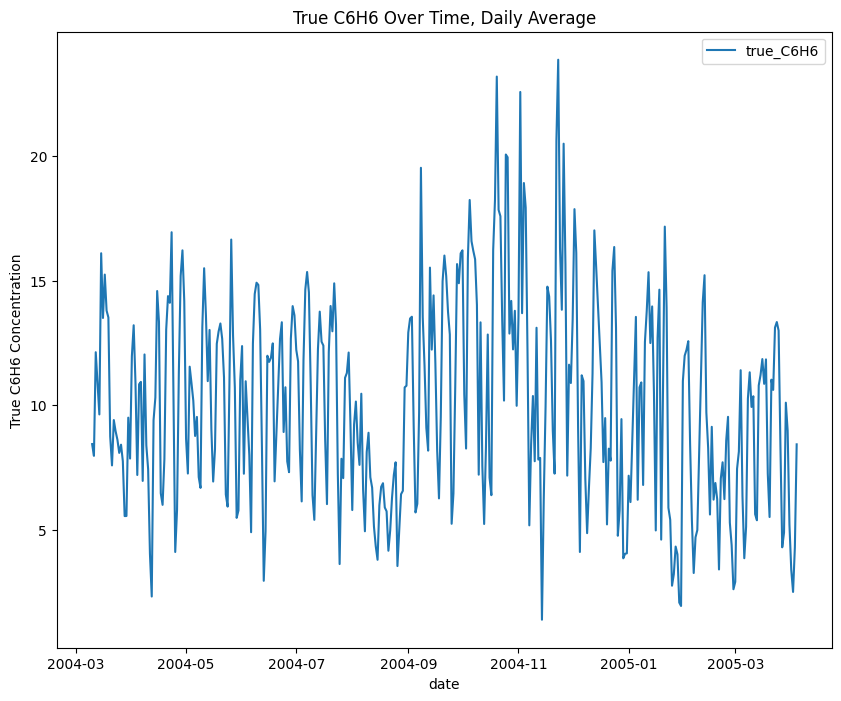

In [ ]:
pd.pivot_table(air_qu, values = "true_C6H6", index = "date")\
    .plot.line(title = "True C6H6 Over Time, Daily Average",
               ylabel = "True C6H6 Concentration")

<Axes: title={'center': 'Sensor Readings Over Time, Daily Average'}, xlabel='date', ylabel='Sensor Readings for Environmental Pollutants'>

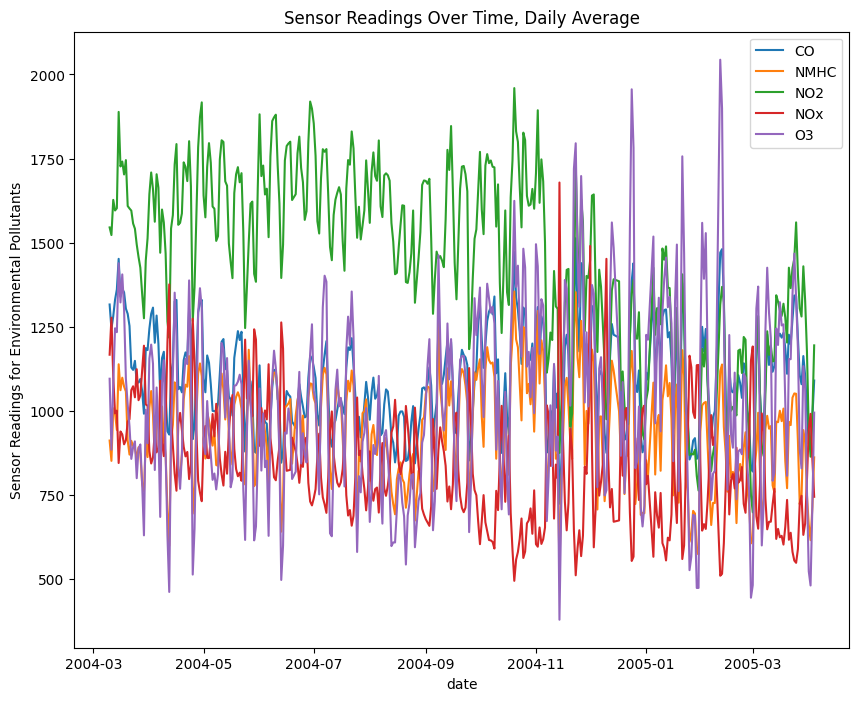

In [ ]:
pd.pivot_table(air_qu, values = ["CO","NMHC","NOx", "NO2", "O3"], index = "date")\
    .plot.line(title = "Sensor Readings Over Time, Daily Average",
               ylabel = "Sensor Readings for Environmental Pollutants",
               figsize = (10,8))

In [ ]:
data_summary = air_qu.groupby("Date").agg(max_C6H6 = ("true_C6H6", "max"),
                                                   mean_C6H6 = ("true_C6H6", "mean"),
                                                   median_C6H6 = ("true_C6H6", "median"),
                                                   min_C6H6 = ("true_C6H6", "min"))
data_summary

,max_C6H6,mean_C6H6,median_C6H6,min_C6H6
Date,,,,
2004-03-10,11.9,8.450000,9.10,4.7
2004-03-11,27.4,7.979167,5.75,1.1
2004-03-12,32.6,12.129167,12.20,1.0
2004-03-13,19.6,10.916667,10.75,2.6
2004-03-14,23.1,9.637500,8.90,2.4
...,...,...,...,...
2005-04-01,7.4,3.412500,3.55,0.8
2005-04-02,5.8,2.529167,2.45,0.9
2005-04-03,11.1,4.316667,4.15,1.0


<Axes: xlabel='Date'>

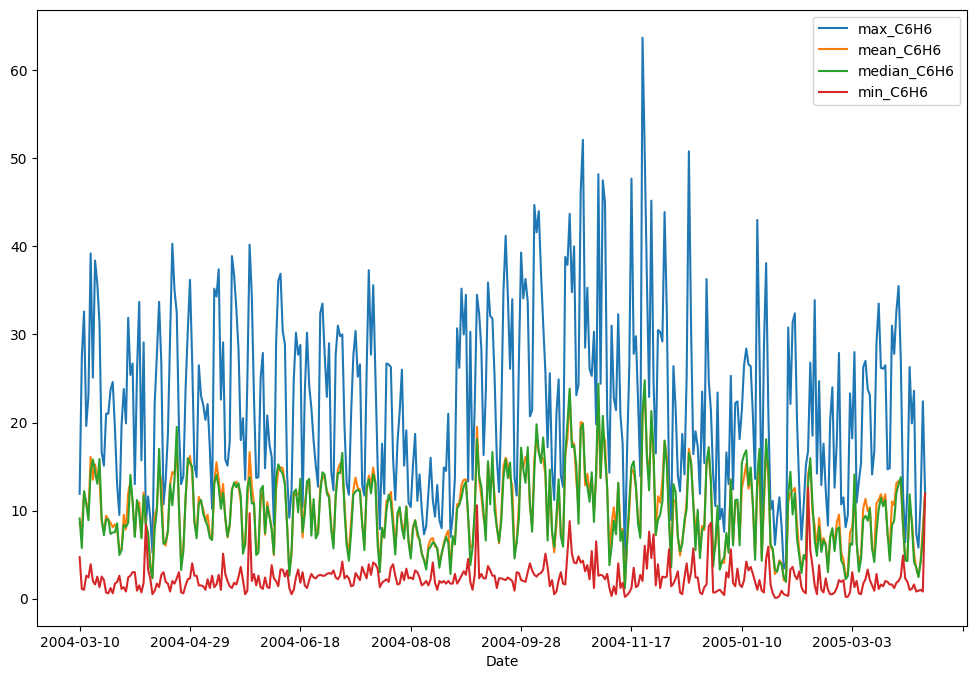

In [ ]:
#true C6H6 summaries over time
data_summary.plot(kind = "line", figsize = (12,8))

In [ ]:
C6H6_monthly = air_qu.groupby(["year", "month"]).agg(max_C6H6 = ("true_C6H6", "max"),
                                                   mean_C6H6 = ("true_C6H6", "mean"),
                                                   median_C6H6 = ("true_C6H6", "median"),
                                                   min_C6H6 = ("true_C6H6", "min"))
C6H6_monthly.head()

max_C6H6  mean_C6H6  median_C6H6  min_C6H6
year month                                            
2004 3          39.2   9.932745         8.65       0.6
     4          40.3  10.389177         8.50       0.5
     5          40.2  10.219041         9.10       0.5
     6          36.9  10.595748         9.50       0.5
     7          37.3  10.599462         9.90       1.3

### Numeric Variables Over Time

#### True C6H6 Concentration

Text(0.5, 1.0, 'True C6H6 Concentration Over Time (Weekly Values)')

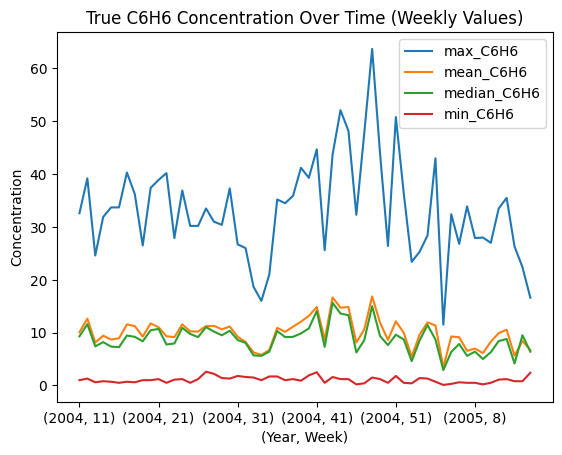

In [171]:
air_qu.groupby(["year", "week"]).\
    agg(max_C6H6 = ("true_C6H6", "max"),
        mean_C6H6 = ("true_C6H6", "mean"),
        median_C6H6 = ("true_C6H6", "median"),
        min_C6H6 = ("true_C6H6", "min"))\
    .plot(kind = "line")
plt.xlabel("(Year, Week)")
plt.ylabel("Concentration")
plt.title("True C6H6 Concentration Over Time (Weekly Values)")

#### Sensor Readings of Environmental Pollutants

Text(0.5, 1.0, 'Sensor Readings Over Time (Monthly Values)')

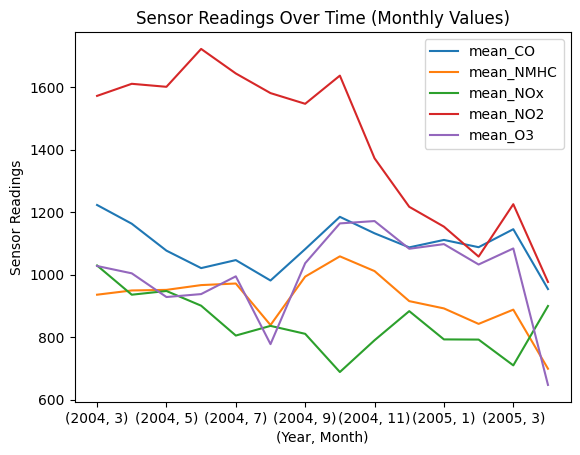

In [187]:
air_qu.groupby(["year", "month"]).\
    agg(mean_CO = ("CO", "mean"),
        mean_NMHC = ("NMHC", "mean"),
        mean_NOx = ("NOx", "mean"),
        mean_NO2 = ("NO2", "mean"),
        mean_O3 = ("O3", "mean"))\
    .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Time (Monthly Values)")

#### Weather Conditions

Temperature

Text(0.5, 1.0, 'Temperature Over Time (Weekly Values)')

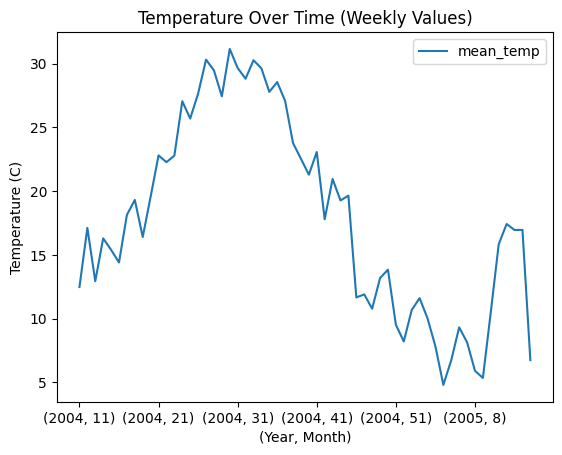

In [188]:
air_qu.groupby(["year", "week"]).agg(mean_temp = ("temp", "mean"))\
                                 .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Temperature (C)")
plt.title("Temperature Over Time (Weekly Averages)")

Relative Humidity

Text(0.5, 1.0, 'Relative Humidity Over Time (Weekly Averages)')

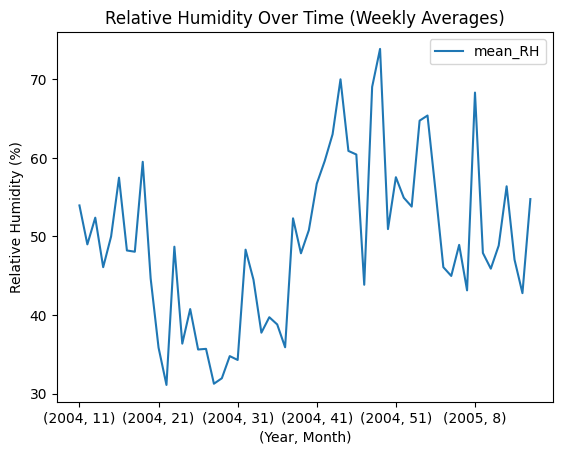

In [190]:
air_qu.groupby(["year", "week"]).agg(mean_RH = ("rel_hum", "mean"))\
                                 .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Relative Humidity (%)")
plt.title("Relative Humidity Over Time (Weekly Averages)")

Absolute Humidity

Text(0.5, 1.0, 'Absolute Humidity Over Time (Weekly Averages)')

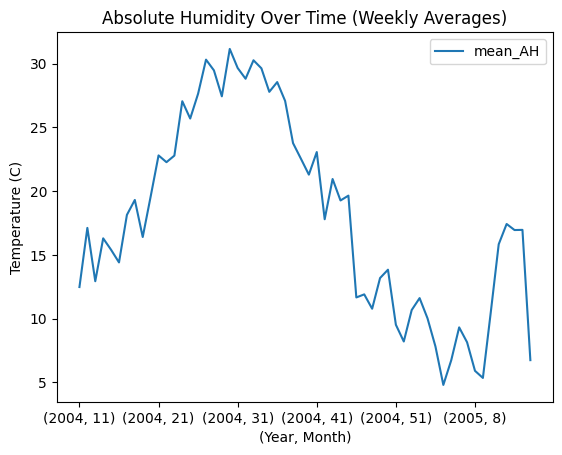

In [191]:
air_qu.groupby(["year", "week"]).agg(mean_AH = ("temp", "mean"))\
                                 .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Temperature (C)")
plt.title("Absolute Humidity Over Time (Weekly Averages)")

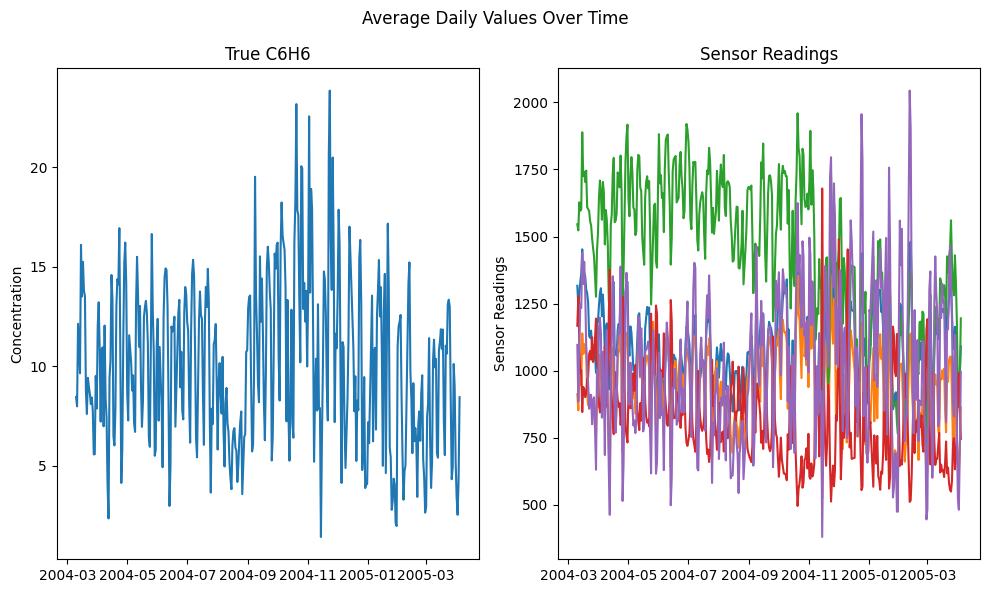

In [ ]:
#time series of daily averages for num vars separately
#x1, x2, x3 = air_qu.temp, air_qu.rel_hum, air_qu.abs_hum
#y = air_qu.true_C6H6

x = pd.pivot_table(air_qu, values = "true_C6H6", index = "date").index
y1 = pd.pivot_table(air_qu, values = "true_C6H6", index = "date")
y2 = pd.pivot_table(air_qu, values = ["CO", "NMHC", "NOx", "NO2", "O3"],
                    index = "date")

fig, ax = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Average Daily Values Over Time")
#fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
#fig.supxlabel("Sensor Responses for Environmental Pollutant Concentrations")

ax[0].plot(x, y1)
ax[0].set_title("True C6H6")
ax[0].set_ylabel("Concentration")

ax[1].plot(x, y2)
ax[1].set_title("Sensor Readings")
ax[1].set_ylabel("Sensor Readings")
#ax[2].plot(x3, y); ax[2].set_title("Absolute Humidity")

fig.tight_layout()

In [ ]:
#time series of true C6H6 for env cat vars
try to use sns.scatterplot